In [1]:
from sklearn import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


import numpy as np
import matplotlib.pyplot as plt
import pydotplus

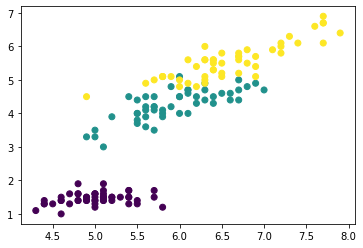

In [2]:
iris = datasets.load_iris()

x_axis = iris.data[:,0]
y_axis = iris.data[:,2]
plt.scatter(x_axis, y_axis, c=iris.target)
plt.show()

In [5]:
data_train, data_test, target_train, target_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

tree0 = DecisionTreeClassifier()
tree0.fit(data_train, target_train)

target_test_pre0 = tree0.predict(data_test)

num = iris.data.shape[0]
num_train = data_train.shape[0] 
num_test = num - num_train
acc0 = sum(target_test_pre0 == target_test) / num_test


print('Predictive value：\n',(tree0.predict(data_test)))
print('Actual value：\n',(target_test))

print('The accuracy is ', acc0)


Predictive value：
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Actual value：
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
The accuracy is  1.0


In [6]:
#entropy index
tree1 = DecisionTreeClassifier(criterion='entropy', random_state=42) 
tree1.fit(data_train, target_train)
target_test_pre1 = tree1.predict(data_test) 
acc1 = metrics.accuracy_score(target_test, target_test_pre1)

print('The accuracy of entropy is ', acc1)

The accuracy of entropy is  0.9777777777777777


In [7]:
#gini index
tree2 = DecisionTreeClassifier(criterion='gini' ,random_state=42) 
tree2.fit(data_train, target_train)
target_test_pre2 = tree2.predict(data_test) 

num2 = iris.data.shape[0]
num_train2 = data_train.shape[0] 
num_test2 = num2 - num_train2 
#acc2 = sum(target_test_pre2 == target_test) / num_test2

acc2 = metrics.accuracy_score(target_test, target_test_pre2)

print('The accuracy gini is ', acc2)

The accuracy gini is  1.0


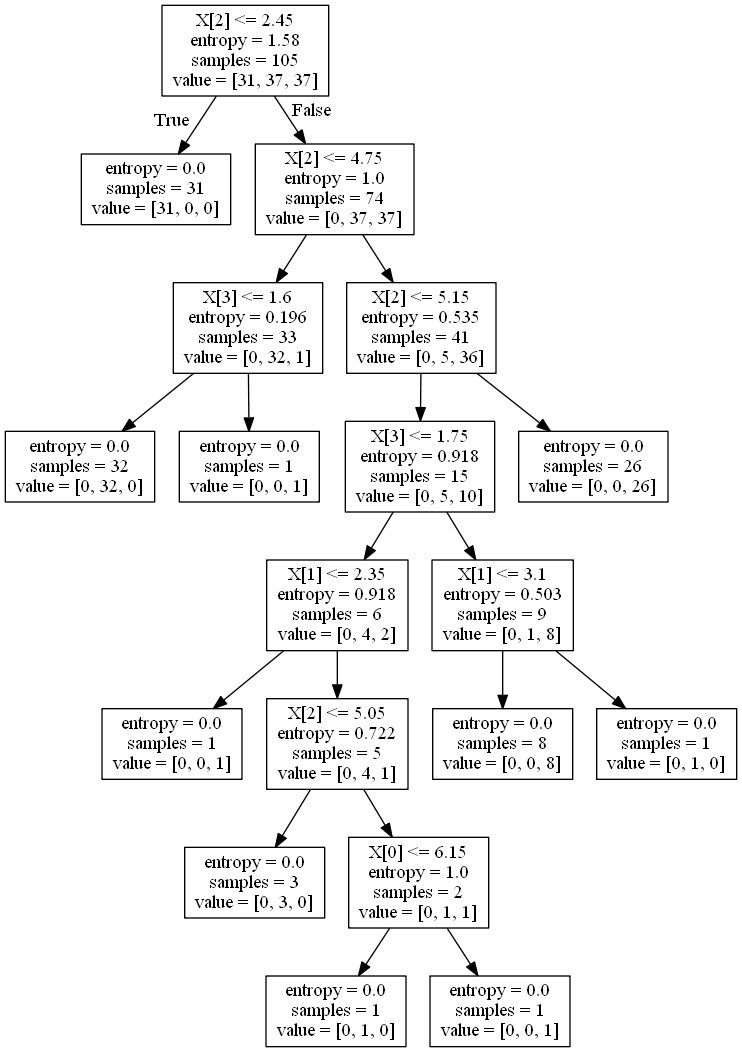

In [9]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
export_graphviz(tree1, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("decision_tree_iris_tp3.pdf")

Image(graph.create_png())


In [10]:
print(tree0.predict_proba(data_test))

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [11]:
print(tree0.predict(data_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [12]:
#Load diabetes dataset
diabetes = datasets.load_diabetes()

data = diabetes.data
target = diabetes.target

print(data.shape)
print(data[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]


In [13]:
#Regression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

x_train_diabetes = diabetes.data[:-20]
y_train_diabetes = diabetes.target[:-20]

x_test_diabetes = diabetes.data[-20:]
y_test_diabetes = diabetes.target[-20:]



In [14]:
#Decision tree regression
reg = DecisionTreeRegressor(random_state=42) 
reg.fit(x_train_diabetes, y_train_diabetes)

y_pre_tree = reg.predict(x_test_diabetes) 

print("Prediction of decision tree regression method is: \n", y_pre_tree)

Prediction of decision tree regression method is: 
 [128. 124. 150.  37. 172. 200. 220.  72.  96.  80. 268.  51.  96.  92.
  77. 275. 230.  83.  84.  97.]


In [15]:
#MSE of decision tree regression
mse_tree = mean_squared_error(y_test_diabetes, y_pre_tree)

print("Mean squared error of decision tree method is: ", mse_tree)

Mean squared error of decision tree method is:  6234.2


In [16]:
#Linear regression
line = linear_model.LinearRegression()
line.fit(x_train_diabetes, y_train_diabetes)

y_pred_line = line.predict(x_test_diabetes)  

print("Prediction of linear repression method is: \n", y_pred_line)

Prediction of linear repression method is: 
 [197.61846908 155.43979328 172.88665147 111.53537279 164.80054784
 131.06954875 259.12237761 100.47935157 117.0601052  124.30503555
 218.36632793  61.19831284 132.25046751 120.3332925   52.54458691
 194.03798088 102.57139702 123.56604987 211.0346317   52.60335674]


In [17]:
#MSE of linear regression
mse_line = mean_squared_error(y_test_diabetes, y_pred_line)

print("Mean squared error of linear regression method is: ", mse_line)

Mean squared error of linear regression method is:  2004.5676026898211


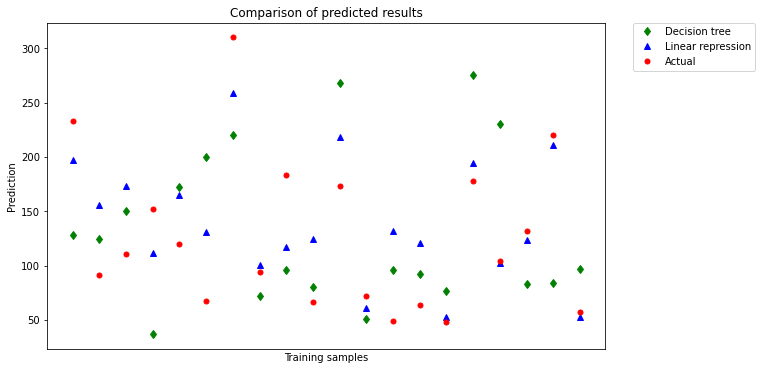

In [18]:
plt.figure(figsize = (10,6))
plt.plot(y_pre_tree, 'gd', label='Decision tree')
plt.plot(y_pred_line, 'b^', label='Linear repression')

plt.plot(y_test_diabetes, 'r.', ms=10, label='Actual')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Prediction')
plt.xlabel('Training samples')
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0)
plt.title('Comparison of predicted results')

plt.show()

In [19]:
from sklearn.svm import SVC


#SVM in iris
svm=SVC()
svm.fit(data_train,target_train)

svm_pre=svm.predict(data_test) 

acc_svm = sum(svm_pre == target_test) / num_test


#acc_svm2 = metrics.accuracy_score(svm_pre, target_test)

print('Predictive value：\n',svm_pre)
print('Actual value：\n',target_test)
print('Accuracy rate of SVM：',acc_svm)


Predictive value：
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Actual value：
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Accuracy rate of SVM： 1.0


In [21]:
#Normalizatoin in iris
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler().fit(data_train)

data_std_train = stdScaler.transform(data_train)
data_std_test = stdScaler.transform(data_test)


In [22]:
#After normalization

svm_nor=SVC()
svm_nor.fit(data_std_train,target_train)

svm_nor_pre=svm_nor.predict(data_std_test) 

acc_svm_nor = sum(svm_nor_pre == target_test) / num_test

print('Predictive value：\n',svm_nor_pre)
print('Actual value：\n',target_test)
print('Accuracy rate of SVM：',acc_svm_nor)


Predictive value：
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Actual value：
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Accuracy rate of SVM： 1.0


In [24]:
#Kernel trrick
import time
from sklearn.metrics import accuracy_score
svm1 = SVC(C=1, kernel='rbf')
svm2 = SVC(C=1, kernel='poly')
svm3 = SVC(C=1, kernel='sigmoid')


svm1.fit(data_train, target_train)

svm2.fit(data_train, target_train)

svm3.fit(data_train, target_train)


SVC(C=1, kernel='sigmoid')

In [27]:
svm1_pre = svm1.predict(data_test) 

svm2_pre = svm2.predict(data_test) 

svm3_pre = svm3.predict(data_test) 

svm1_acc = metrics.accuracy_score(target_test, svm1_pre)

svm2_acc = metrics.accuracy_score(target_test, svm2_pre)

svm3_acc = metrics.accuracy_score(target_test, svm3_pre)

print("Accuracy of Radial Basis Function Kernel is: ",svm1_acc)
print("Accuracy of Polynomial Kernel is: ",svm2_acc)
print("Accuracy of Sigmoid Kernel is: ",svm3_acc)


Accuracy of Radial Basis Function Kernel is:  1.0
Accuracy of Polynomial Kernel is:  0.9777777777777777
Accuracy of Sigmoid Kernel is:  0.2222222222222222
